https://pyprog.pro/mpl/mpl_main_components.html

# 4. Основные компоненты matplotlib
MPL очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов:

<img src="files/mpl_anatomy.jpg">

Базовые компоненты графика matplotlib

Figure - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.

Axes - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты. В Этом уроке мы будем контролировать тики, метки и пределы данных через другие механизмы, поэтому подробно рассматривать оси мы не будем.

## 4.1. Начало работы
Давайте попробуем выполним следующий код:

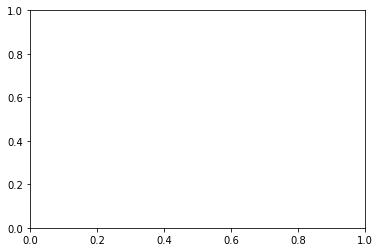

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

Создание областей Axes и Figure графика matplotlib

В строке fig = plt.figure() мы создали область Figure (экземпляр класса figure). В строке ax = fig.add_subplot(111) мы добавили к Figure область Axes. Вообще, было бы правильнее использовать fig.add_axes, но в данном случае fig.add_subplot(111) намного удобнее, в конце концов subplot просто размещает Axes на сетке Figure. Обратите внимание на параметр, который мы передаем 111 - это первая строка, первый столбец и первая (единственная) ячейка на сетке Figure.

В том что Figure и Axes это разные области можно легко убедиться если изменить их цвет:

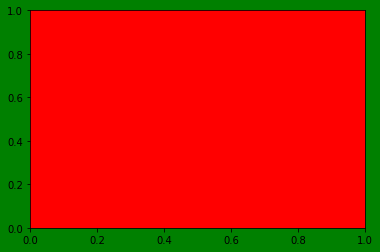

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'red')

plt.show()

График демонстрирующий что Axes и Figure это разные области

Кстати, Axes должна принадлежать только одной области Figure. Как правило, всегда сначала создается область Figure, а затем с помощью add_subplot() в Figure размещается одна или несколько областей Axes.

А теперь обратите внимание на то, как с помощью метода set() мы изменили цвет Figure и Axes. По сути, это самый быстрый способ устанавливать параметры, но он не самый явный. Давайте установим параметры явно. Сотрите строчку fig.set(facecolor = 'green'), а затем напечатайте fig.set и нажмите клавишу Tab после чего вы увидите длинный список всех методов Figure, которые начинаются с set:

<img src="files/autocompletion_1.jpg">

Автодополнение кода после нажатия клавиши Tab в Jupyter

Затем нажатием клавиши стрелка вниз найдите метод set_facecolor и нажмите Enter:

Поиск среди вариантов автодополнения выбирается стрелками вниз и вверх

<img src="files/autocompletion_2.jpg">

После этого останется только добавить цвет в виде строки ('green') и все.


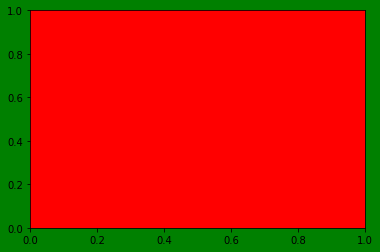

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.

fig.set_facecolor('green')
ax.set(facecolor = 'red')

plt.show()

Тоже самое мы можем проделать и с Axes. Кстати, именно Axes вам придется видоизменять чаще всего, поэтому давайте установим побольше параметров для данной области:

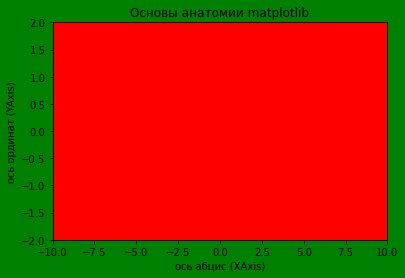

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.

fig.set_facecolor('green')

ax.set_facecolor('red')
ax.set_xlim([-10, 10])
ax.set_ylim([-2, 2])
ax.set_title('Основы анатомии matplotlib')
ax.set_xlabel('ось абцис (XAxis)')
ax.set_ylabel('ось ординат (YAxis)')

plt.show()

Результат добавления параметров к областям Axes и Figure

Хотя мы могли бы выполнить это более коротким способом:

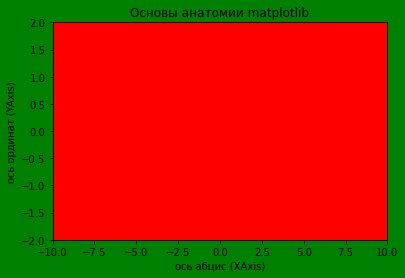

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'red',
       xlim = [-10, 10],
       ylim = [-2, 2],
       title = 'Основы анатомии matplotlib',
       xlabel = 'ось абцис (XAxis)',
       ylabel = 'ось ординат (YAxis)')

plt.show()

Данный способ хорош если вы обладаете некоторым опытом и помните имена всех параметров наизусть. Новичкам я все-таки рекомендую явный способ установки параметров: так и быстрее (благодаря автодополнению) и очевиднее.

Метод set есть практически у всех объектов matplotlib. Например, нам вдруг захотелось изменить цвет и размер title. Для этого существуют так же два способа:

Text(0.5, 1.0, 'Основы анатомии matplotlib')

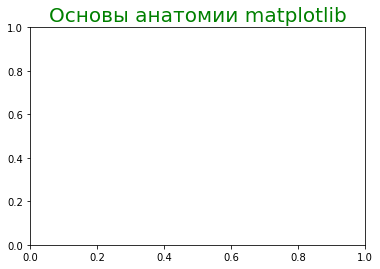

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
#  Способ №1:
ax.set_title('Основы анатомии matplotlib', color = 'green', size = 20)

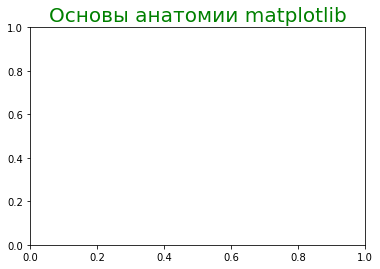

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
#  Способ №2:
ax.set_title('Основы анатомии matplotlib')
ax.title.set_color('green')
ax.title.set_size(20)

В таких случаях первый способ, снова, кажется более простым. Но все же второй способ позволяет создавать код который легко понять и в котором легко ориентироваться, а это тоже очень дорогого стоит.

И еще, напоследок, график который мы создали - это просто издевательство над восприятием человека. Такие графики можно делать только для примера! Создание отличных графиков - это целая наука (или искусство), у которой даже есть название инфографика.

## 4.2. Отображение данных на графике
Большинство графиков: линий, гистограмм, круговых диаграмм т.е. отображений данных происходит на Axes. Поэтому, для рисования на Axes необходимо использовать какой-нибудь из его методов. К слову сказать, этих методов целая куча, но мы сосредоточимся всего на двух: plot и scatter.

plot рисует точки соединенные линиями;
scatter просто рисует точки
Давайте построим простой график на котором будет присутствовать отображение одних данных точками, а других линиями:

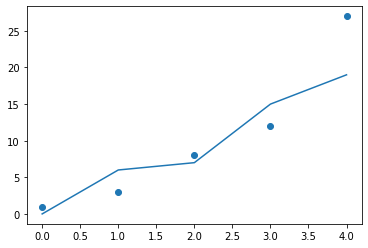

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19])
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27])

plt.show()

Отображение данных на области Axes в matplotlib

Нарисованные данные так же поддерживают самые разные параметры внешнего вида:

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], color = 'black', linewidth = 5)
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'blue', marker = '*')

plt.show()

Управление параметрами внешнего вида отображаемых данных в matplotlib

Параметры внешнего вида придется указывать (если надо) вместе с данными внутри ax.plot() и ax.scatter(). Это противоречит моим рекомендациям, но и в этом случае можно оформить код в более читаемый вид:

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4]
y_1 = [0, 6, 7, 15, 19]
y_2 = [1, 3, 8, 12, 27]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y_1,
        color = 'black',
        linewidth = 5)

ax.scatter(x, y_2,
           color = 'blue',
           marker = '*')

plt.show()

## 4.3. Методы Axes и pyplot
Сейчас вы поймете как мы раньше создавали графики без всяких Figure и Axes. Дело в том что почти все методы axes присутствуют в модуле pyplot. Например, при вызове plt.title('spam') модуль pyplot вызывает ax.set_title('spam'). Можно сказать, что модуль pyplot создает Figure и Axes автоматически (хотя это не совсем так). Фактически мы можем переписать весь наш пример следующим образом:

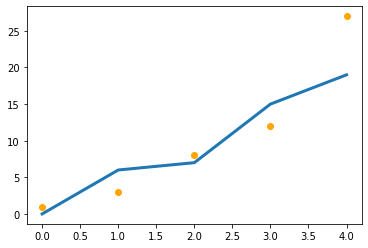

In [25]:
import matplotlib.pyplot as plt


plt.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], linewidth = 3)
plt.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'orange')

plt.show()

Отображение данных методами модуля pyplot в matplotlib

Но мы больше не будем так делать, потому что "Явное лучше чем неявное". Нет, если мы строим так сказать "одноразовые графики" с небольшими скриптами, только ради того что бы что-то быстро визуализировать, то от краткости скриптов мы только выигрываем. Однако, если нам придется работать с несколькими областями Axes или придется создавать большие скрипты для построения сложной графики, то использование явных определений Figure и Axes сделает код более очевидным и понятным, пускай даже за счет увеличения его объема.

## 4.4. Несколько Axes на одной Figure
Очень часто, нам необходимо размещать несколько графиков рядом друг с другом. Это проще всего сделать используя plt.subplots(). Но давайте для начала разберем следующий пример:

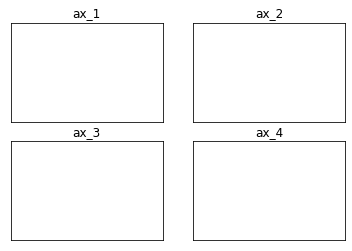

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()

Несколько областей Axes для графиков в matplotlib

В этом примере, так же как и раньше, мы сначала создали область Figure, а затем с помощью команды fig.add_subplot() начали добавлять, одну за другой область Axes (ax_1, ax_2, ax_3, ax_4). Причем заметьте, каждая область Axes является независимой от других, то есть на на них могут быть нарисованы самые разные графики и установлены самые разные параметры внешнего вида.

Теперь давайте немного разберемся с тем что делает метод add_subplot(). А делает он следующее, разбивает Figure на указанное количество строк и столбцов. После такого разбиения Figure можно представить как таблицу (или координатную сетку). Затем область Axes помещается в указанную ячейку. Для всего этого add_subplot() необходимо всего три числа, которые мы и передаем ему в качестве параметров:

- первое - количество строк;
- второе - количество столбцов
- третье - индекс ячейки.

Индексирование полученных ячеек начинается с левого верхнего угла, выполняется построчно слева-направо и заканчивается в правом нижнем углу:

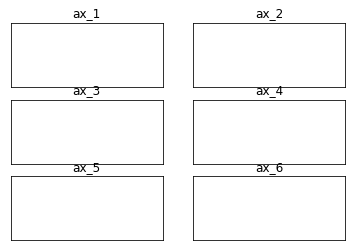

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

Индексирование и размещение областей Axes (графиков) в matplotlib

Заполнять областями Axes всю область Figure не обязательно:

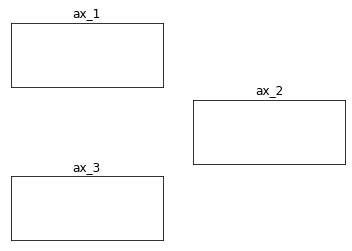

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 2, 5)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

Выборочное размещение областей Axes (графиков) на области Figure в matplotlib

Каждый отдельный вызов add_subplot() выполняет разбивку Figure, так как как указано в его параметрах и не зависит от предыдущих разбиений:

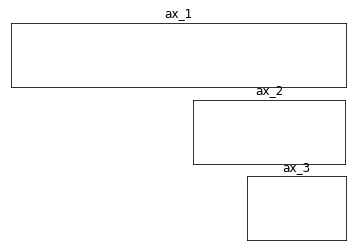

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 3, 9)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

Размещение областей Axes (графиков) разного размера на области Figure в matplotlib

Такое поведение метода add_subplot() позволяет располагать графики как вам необходимо. Области Axes могут перекрывать друг-друга, быть разного размера или разделенными некоторым пространством, впрочем, как и размещаться в произвольных местах:

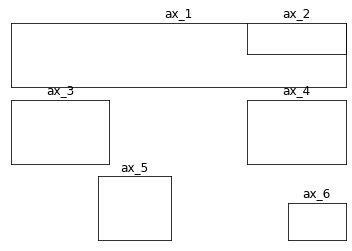

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(6, 3, 3)
ax_3 = fig.add_subplot(3, 3, 4)
ax_4 = fig.add_subplot(3, 3, 6)
ax_5 = fig.add_subplot(3, 4, 10)
ax_6 = fig.add_subplot(5, 5, 25)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

Произвольное размещение нескольких областей Axes (графиков) разного размерас перекрытием и без в matplotlib

## 4.5. subplots()
Конечно, такой способ размещения некоторого количества областей Axes на Figure довольно гибок, но на практике функция plt.subplots(nrows, ncols) оказывается гораздо удобнее:

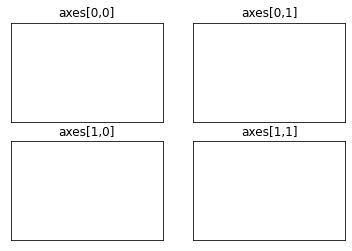

In [1]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])

plt.show()

Размещение нескольких областей Axes (графиков) методом subplots() в matplotlib

Очень часто нам нужно что бы наши области Axes были расположены на самой обычной сетке. Что в общем то и делает plt.subplots(nrows, ncols). Однако не следует забывать, что как правило, все чуточку сложнее. Давайте выполним следующий код:

(<Figure size 432x288 with 4 Axes>, array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))


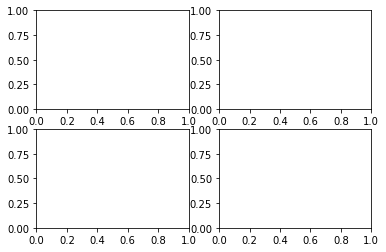

In [36]:
print(plt.subplots(nrows = 2, ncols = 2))

(<matplotlib.figure.Figure object at 0xaaca234c>,
array([[<matplotlib.axes._subplots.AxesSubplot object at 0xaad7946c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xab04a6ac>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0xaac8956c>,
        <matplotlib.axes._subplots.AxesSubplot object at 0xaaef0dac>]],
      dtype=object))

Если вглядеться в вывод, то становится видно, что plt.subplots(nrows, ncols) создает кортеж из двух элементов:

- Область Figure;
- Массив объектов NumPy, состоящий из двух строк и двух столбцов. Каждый элемент этого массива представляет собой отдельную область Axes, к которой можно обратиться по ее индексу в данном массиве.


Для дальнейшей работы с данными областями нам необходимо распаковать данный кортеж, что мы и делаем в строке:

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

Теперь fig - это Figure, а axes - это массив NumPy, элементами которого являются объекты Axes. Далее, мы решили установить каждой области Axes свой заголовок:

- axes[0, 0].set(title='axes[0, 0]')
- axes[0, 1].set(title='axes[0, 1]')
- axes[1, 0].set(title='axes[1, 0]')
- axes[1, 1].set(title='axes[1, 1]')

Поскольку каждый заголовок (как-бы) уникальный, нам пришлось вручную вызвать каждую область Axes и устанавливать для нее параметр title.

Но если для каждой области нам необходимо установить одинаковые параметры, то это можно сделать в цикле:

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])

Хотя, зачастую, даже заголовки можно установить в том же самом цикле:

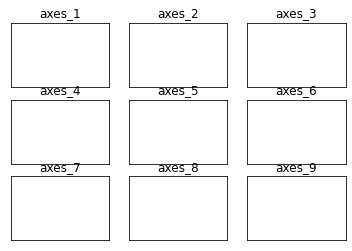

In [37]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3)

n = 1

for ax in axes.flat:
    ax.set(title='axes_' + str(n), xticks=[], yticks=[])
    n += 1
plt.show()

Установка различных параметров множества областей Axes (графиков) внутри цикла в matplotlib

По умолчанию количество строк и столбцов в методе subplots равно 1, что удобно для быстрого создания Figure с одной областью Axes:


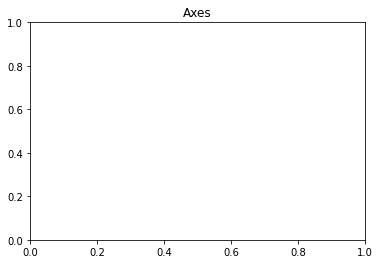

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()       #  одна строка вместо двух:
                               #  fig = plt.figure()
                               #  ax = fig.add_subplot(111)
ax.set(title='Axes')

plt.show()

subplots по умолчанию создает одну область Figure с одной областью Axes

Далее, в таких простых случаях, мы будем очень часто пользоваться именно этой строкой fig, ax = plt.subplots() - это сокращает код, но не преуменьшает его ясности (мы по прежнему создаем Figure и помещаем на нее Axes).
